In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [ ]:
from utils.dataset_loader import FashionMNIST, CIFAR10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Loading and plotting the datasets

In [3]:
seed_value = 21

In [4]:
f_dataset = FashionMNIST(batch_size=32, seed=seed_value)

train_ds = f_dataset.get_dataloader(train=True)
test_ds = f_dataset.get_dataloader(train=False)

for imgs, labels in train_ds.take(1):
    print("image batch shape: ", imgs.shape)
    print("X type: ", imgs.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", f_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3]
labels:  ['Ankle boot', 'Top/T-shirt', 'Top/T-shirt', 'Dress', 'Top/T-shirt', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal', 'Top/T-shirt', 'Ankle boot', 'Sandal', 'Sandal', 'Sneaker', 'Ankle boot', 'Trouser', 'Top/T-shirt', 'Shirt', 'Coat', 'Dress', 'Trouser', 'Coat', 'Bag', 'Coat', 'Dress', 'Top/T-shirt', 'Pullover', 'Coat', 'Coat', 'Sandal', 'Dress']


In [5]:
c_dataset = CIFAR10(batch_size=32, seed=seed_value)

train_ds_10 = c_dataset.get_dataloader(train=True)
test_ds_10 = c_dataset.get_dataloader(train=False)

for imgs2, labels2 in train_ds_10.take(1):
    print("image batch shape: ", imgs2.shape)
    print("X type: ", imgs2.dtype)
    #print("Label batch: ", labels2.numpy())
    print("labels: ", c_dataset.text_labels(labels2))


image batch shape:  (32, 28, 28, 3)
X type:  <dtype: 'float32'>
labels:  ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck', 'truck', 'truck', 'cat', 'bird', 'frog', 'deer', 'cat', 'frog', 'frog', 'bird', 'frog', 'cat', 'dog', 'deer', 'airplane', 'airplane', 'truck']


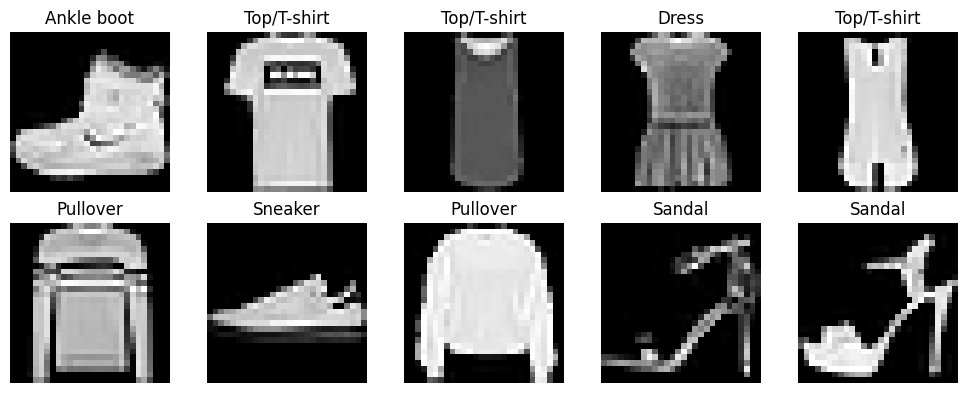

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i].numpy().squeeze(), cmap='gray')
    plt.title(f_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

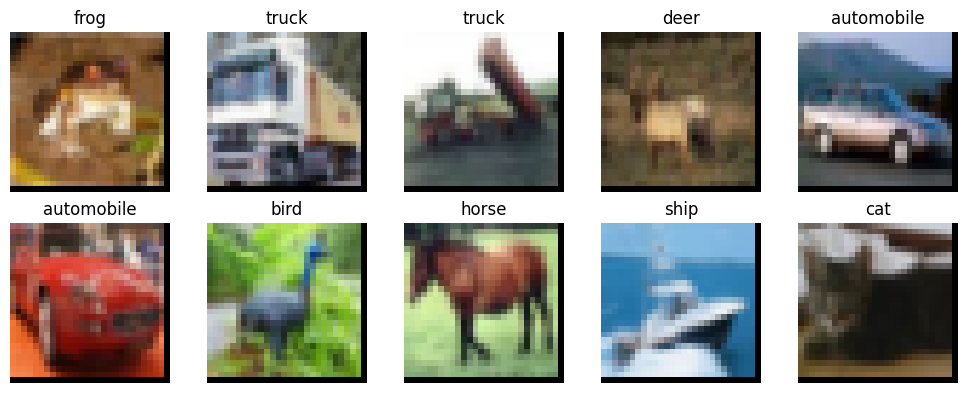

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs2[i].numpy().squeeze(), cmap='gray')
    plt.title(c_dataset.text_labels([labels2[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Get input shape dynamically from dataset
for X, y in train_ds.take(1):
    input_shape = X.shape[1:]  # (28, 28, 1) for FashionMNIST
    print("Input shape:", input_shape)


Input shape: (28, 28, 1)


# Binomial logistic regression on FashionMNIST data using tensorflow

In [ ]:
from utils.model_loader import LogReg
from utils.dataset_loader import split_large_dataset

# Setup
num_classes = 10

## Model fitting without early stopping or regularization

In [10]:
log_model = LogReg(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
log_model.tfLogReg()  # initializes the tf_model inside the class

# Train model on FashionMNIST
hystory1 =  log_model.tf_model.fit(train_ds, epochs=20)



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7365 - loss: 0.7862
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8380 - loss: 0.4718
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.8481 - loss: 0.4394
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.8534 - loss: 0.4239
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.8562 - loss: 0.4143
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.4075
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8588 - loss: 0.4024
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3984
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8611 - loss: 0.3950
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.3922
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8632 - loss: 0.3897
Epoch 12/20
1875/1875 ━

Training model without checking for validation loss has the risk of the model being overfitted on training (seen) data and performs poorly on testing (unseen) data. 
Overfitting happens when the model picks up unique patterns present in training data but absent in testing data, so, the model fails to generalize. 

In [11]:
test_loss, test_accuracy = log_model.tf_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8512 - loss: 0.4333
Test Accuracy: 84.59%


## Early stopping implemented to prevent model overfitting

### Heatmap to find regularization strength

In [12]:
len(f_dataset.train_ds[0]), len(train_ds), len(test_ds)

(60000, 1875, 313)

In [13]:
train_data, val_data = split_large_dataset(train_ds, val_ratio=0.2, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0])) #dataset is unbatched

In [14]:
import seaborn as sns
from tqdm import tqdm


# Define ranges
#l1_values = [0.0, 1e-6, 1e-5, 1e-4, 1e-3]
l1_fixed = 1e-6
learning_rates = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
l2_values = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# Initialize accuracy matrix
val_accuracies = np.zeros((len(l2_values), len(learning_rates)))

# Sweep
for i, l2 in enumerate(tqdm(l2_values, desc="L2 Sweep")):
    for j, lr in enumerate(learning_rates):
        # Build model
        model = LogReg(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
        model.tfLogReg(reg_type='elastic', alpha=l1_fixed, beta=l2, learning_rate=lr)  

        # Train briefly
        history = model.tf_model.fit(
            train_data,
            validation_data=val_data,
            epochs=3,
            verbose=0
        )

        val_accuracies[i, j] = history.history['val_accuracy'][-1]



L2 Sweep:   0%|          | 0/6 [00:00<?, ?it/s]e:\intro-to-ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
L2 Sweep: 100%|██████████| 6/6 [06:56<00:00, 69.40s/it]


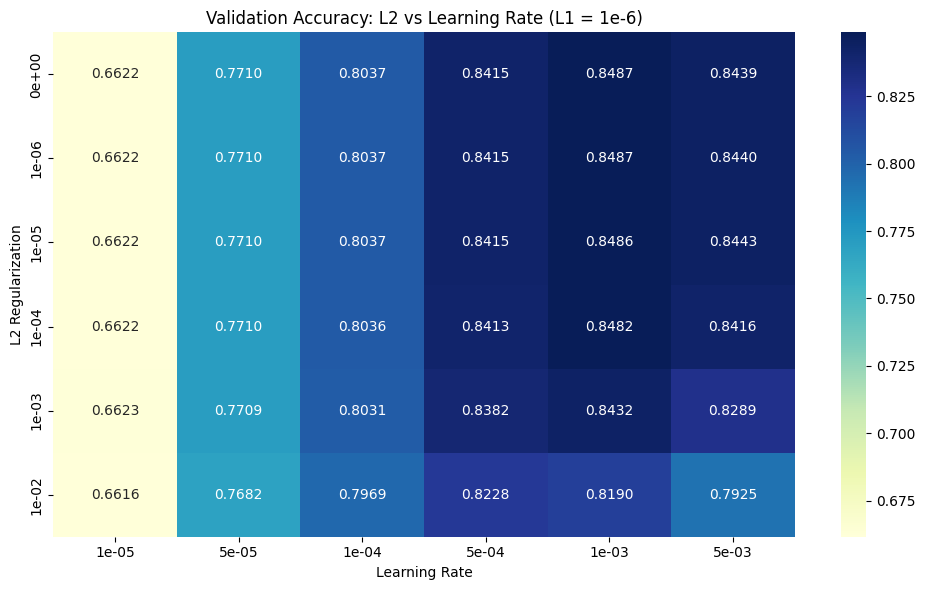

In [15]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(val_accuracies, annot=True, fmt=".4f",
            xticklabels=[f"{lr:.0e}" for lr in learning_rates],
            yticklabels=[f"{l2:.0e}" for l2 in l2_values],
            cmap="YlGnBu")
plt.xlabel("Learning Rate")
plt.ylabel("L2 Regularization")
plt.title("Validation Accuracy: L2 vs Learning Rate (L1 = 1e-6)")
plt.tight_layout()
plt.show()


In [16]:
alpha = 1e-6
beta = 5e-3
lr = 1e-3

Regularization in placed in the cost function to impose prior biases on the model.

L1 regularization pushes some weights to exactly 0.
L2 regularization encourages weights smoothly towards nealy 0.

small L2 regularization strength indicates minimal constraint on weights, but has a higher overfitting risk. However, a large regularization strength (1e-2) reduces model capacity, going for a simpler model keeping the overfitting risk low.

### Model trained with Regularization to combat overfitting

In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=3e-4,
    restore_best_weights=True,
    verbose=1
)


In [18]:
log_model_es = LogReg(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
log_model_es.tfLogReg(reg_type='l2', reg_strength=beta, learning_rate=lr)  # initializes the tf_model inside the class

train_data, val_data = split_large_dataset(train_ds, val_ratio=0.2, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0]))

# Train model on FashionMNIST
history = log_model_es.tf_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
   1499/Unknown 2s 1ms/step - accuracy: 0.7193 - loss: 0.9613

e:\intro-to-ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7194 - loss: 0.9611 - val_accuracy: 0.8217 - val_loss: 0.6764
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8211 - loss: 0.6730 - val_accuracy: 0.8265 - val_loss: 0.6568
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8276 - loss: 0.6560 - val_accuracy: 0.8278 - val_loss: 0.6494
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8290 - loss: 0.6487 - val_accuracy: 0.8276 - val_loss: 0.6456
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8286 - loss: 0.6447 - val_accuracy: 0.8276 - val_loss: 0.6434
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8287 - loss: 0.6422 - val_accuracy: 0.8263 - val_loss: 0.6420
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8286 - loss: 0.6407 - val_accuracy: 0.8261 - val_loss: 0.6413
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8283 - loss: 0.6397 - val_accurac

In [19]:
test_loss, test_accuracy = log_model_es.tf_model.evaluate(test_ds)
print(f"Test Accuracy with early stopping: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8249 - loss: 0.6560
Test Accuracy with early stopping: 81.92%


## Deliberately overfitting the model for visualization of the validation loss and training loss

In [20]:
log_model_of = LogReg(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
log_model_of.tfLogReg()  # initializes the tf_model inside the class

small_train_data, _ = split_large_dataset(train_ds, val_ratio=0.98, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0]))

# Train model on FashionMNIST
history_of = log_model_of.tf_model.fit(
    small_train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[] #no early stopping
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.3330 - loss: 2.0068 - val_accuracy: 0.6115 - val_loss: 1.1944
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6330 - loss: 1.1130 - val_accuracy: 0.6626 - val_loss: 0.9572
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.6966 - loss: 0.9098 - val_accuracy: 0.6973 - val_loss: 0.8582
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7327 - loss: 0.8072 - val_accuracy: 0.7218 - val_loss: 0.7990
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7553 - loss: 0.7387 - val_accuracy: 0.7396 - val_loss: 0.7578
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.7734 - loss: 0.6874 - val_accuracy: 0.7508 - val_loss: 0.7271
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7997 - loss: 0.6467 - val_accuracy: 0.7617 - val_loss: 0.7031
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8119 - loss: 0.6131 - val_accuracy: 0.7696 - v

## Plotting the overfit model and the model trained with penalty

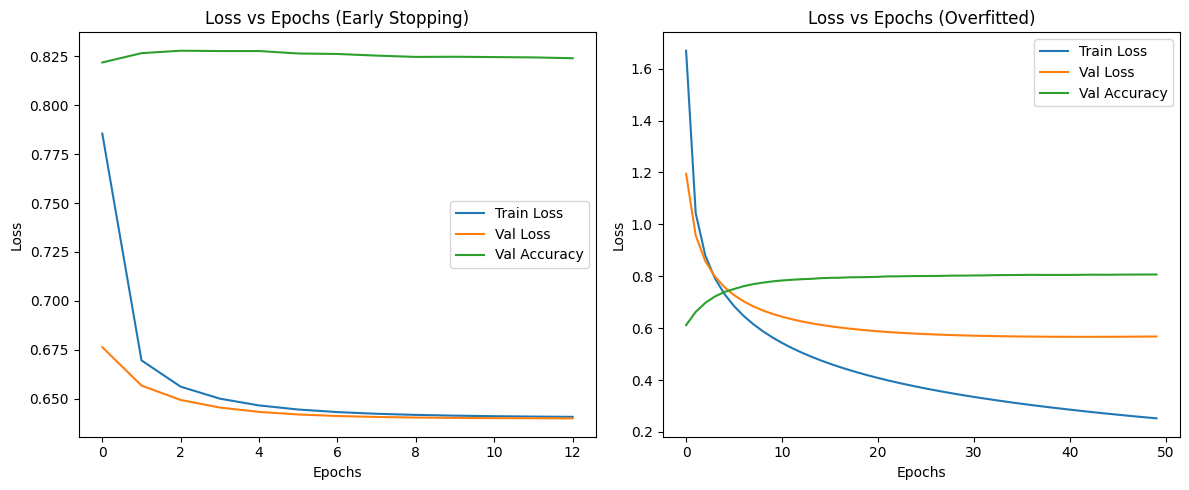

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with Early Stopping
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (Early Stopping)')
axes[0].legend()

# Plot 2: Overfitted
axes[1].plot(history_of.history['loss'], label='Train Loss')
axes[1].plot(history_of.history['val_loss'], label='Val Loss')
axes[1].plot(history_of.history['val_accuracy'], label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (Overfitted)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()


When the model is overfit, the validation loss plateaus as training loss keeps decreasing, indicating that the model is picking up unique characteristics of the training data (noise) and not generalising the model to predict on unseen data.

In [22]:
test_loss1, test_accuracy1 = log_model_of.tf_model.evaluate(test_ds)
print(f"Test Accuracy of Overfitted model: {test_accuracy1 * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8023 - loss: 0.5866
Test Accuracy of Overfitted model: 79.71%


# Loss Surface Plotting

In [23]:
import itertools

w,_ = log_model_es.tf_model.layers[-1].get_weights()
w1,_ = log_model.tf_model.layers[-1].get_weights()

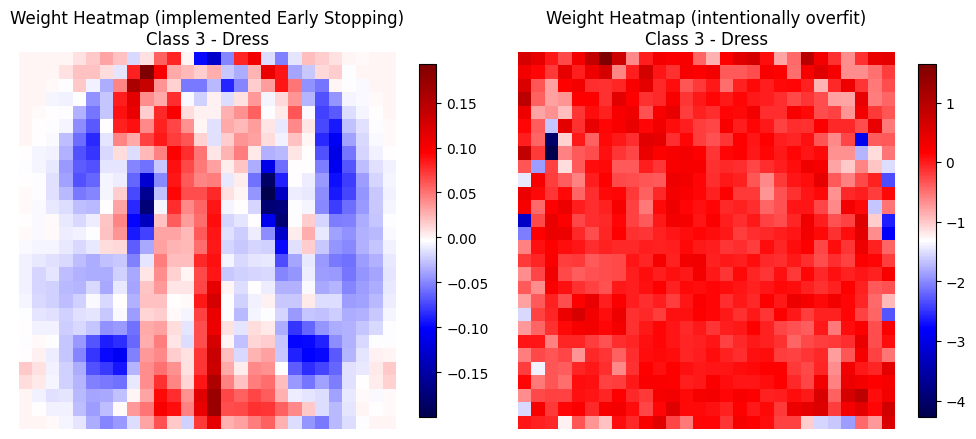

In [24]:
# Choose a class index — for FashionMNIST, let's use 3 = 'Dress'
cls_idx = 3

# Get reshaped weights for the class from both models
weight_for_class = w[:, cls_idx].reshape(28, 28)
weight_for_class_1 = w1[:, cls_idx].reshape(28, 28)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(weight_for_class, cmap='seismic', interpolation='nearest')
axs[0].set_title(f'Weight Heatmap (implemented Early Stopping)\nClass {cls_idx} - {f_dataset.text_labels([cls_idx])[0]}')
axs[0].axis('off')
axs[0].figure.colorbar(axs[0].images[0], ax=axs[0], shrink=0.75)

axs[1].imshow(weight_for_class_1, cmap='seismic', interpolation='nearest')
axs[1].set_title(f'Weight Heatmap (intentionally overfit)\nClass {cls_idx} - {f_dataset.text_labels([cls_idx])[0]}')
axs[1].axis('off')
axs[1].figure.colorbar(axs[1].images[0], ax=axs[1], shrink=0.75)

plt.tight_layout()
plt.show()


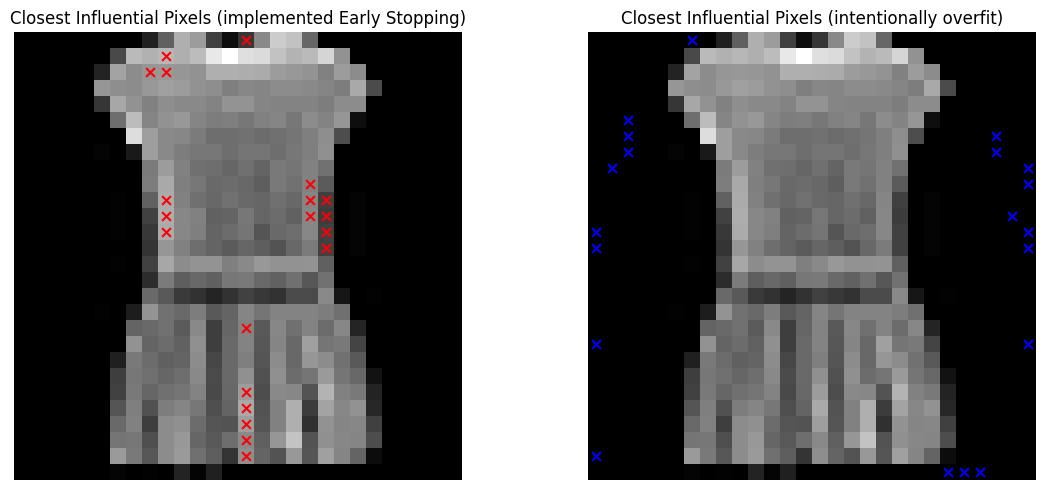

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# === First Plot: log_model_es ===
flat_weights = w[:, cls_idx]
top_indices = np.argsort(np.abs(flat_weights))[-20:]
coords = [(idx // 28, idx % 28) for idx in top_indices]

# Find closest pair
min_dist = float('inf')
shortest_pair_indices = (0, 0)
for i, j in itertools.combinations(range(len(coords)), 2):
    (r1, c1), (r2, c2) = coords[i], coords[j]
    dist = (r1 - r2) ** 2 + (c1 - c2) ** 2
    if dist < min_dist:
        min_dist = dist
        shortest_pair_indices = (i, j)

i1, i2 = shortest_pair_indices[0], shortest_pair_indices[1]

# Sample image
for im, tr in train_ds.unbatch():
    if tr.numpy() == cls_idx:
        sample_image = im.numpy().squeeze()
        break

axs[0].imshow(sample_image, cmap='gray')
axs[0].set_title(f'Closest Influential Pixels (implemented Early Stopping)')
for r, c in coords:
    axs[0].scatter(c, r, c='red', s=40, marker='x')
axs[0].axis('off')


# === Second Plot: log_model ===
flat_weights1 = w1[:, cls_idx]
top_indices1 = np.argsort(np.abs(flat_weights1))[-20:]
coords1 = [(idx // 28, idx % 28) for idx in top_indices1]

k,l = top_indices1[:2]

axs[1].imshow(sample_image, cmap='gray')
axs[1].set_title(f'Closest Influential Pixels (intentionally overfit)')
for r, c in coords1:
    axs[1].scatter(c, r, c='blue', s=40, marker='x')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from utils.loss_surface_plotting import PlotLoss

plot = PlotLoss(log_model_es, train_data)

X,Y,Z = plot.calculateLoss(i1=15, i2=9, cls_idx=cls_idx)


plot1 = PlotLoss(log_model, train_data)

X1,Y1,Z1 = plot1.calculateLoss(i1=k, i2=l, cls_idx=cls_idx)

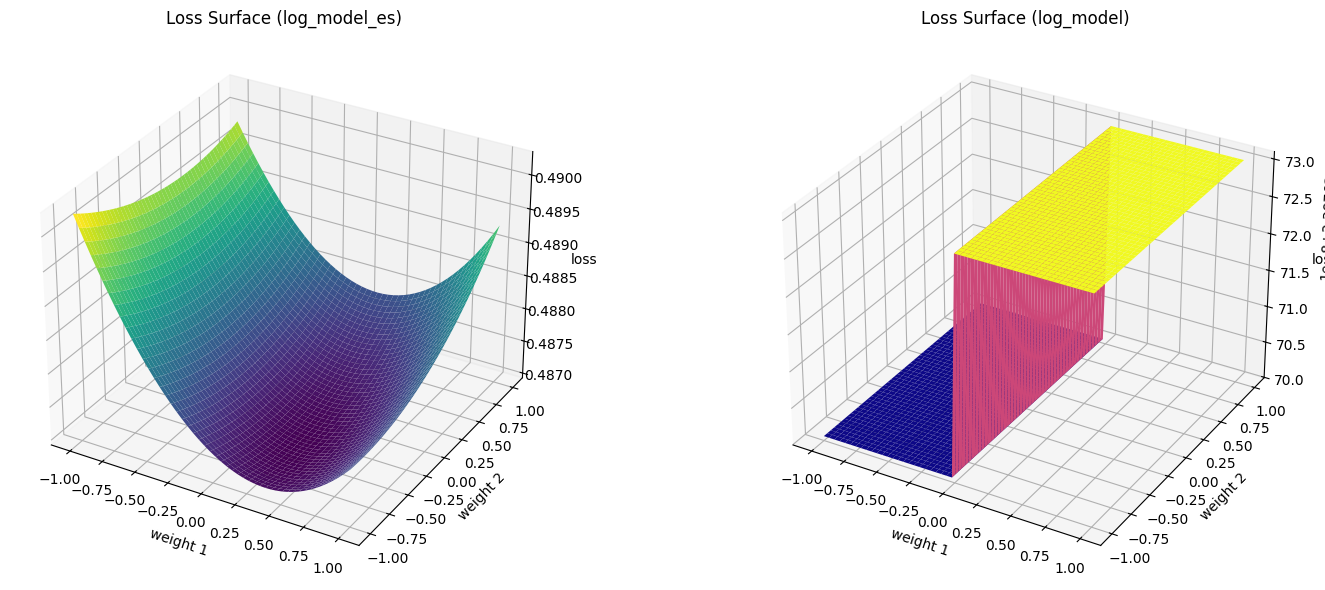

In [27]:
fig = plt.figure(figsize=(16, 6))

# First plot: loss surface for log_model_es
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('weight 1')
ax1.set_ylabel('weight 2')
ax1.set_zlabel('loss')
ax1.set_title('Loss Surface (log_model_es)')

# Second plot: loss surface for log_model
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, Y1, Z1, cmap='plasma')
ax2.set_xlabel('weight 1')
ax2.set_ylabel('weight 2')
ax2.set_zlabel('loss')
ax2.set_title('Loss Surface (log_model)')

plt.tight_layout()
plt.show()


A smooth and bowl shaped loss surface (convex surface) would indicate a single global minima, so, SGD can easily find this point without getting stuck on local minima, which leads to easy optimization.
Whereas, a rugged and sharp loss surface might indicate that the model struggles to optimize.

# Logistic Regression using the Scikit library

In [28]:
# Unbatch and flatten images for scikit-learn
X_flat = []
y_flat = []

for X_batch, y_batch in train_ds.unbatch().take(10000):  # take a subset for faster training
    X_flat.append(tf.reshape(X_batch, [-1]))
    y_flat.append(y_batch)


X_flat = np.stack(X_flat)
y_flat = np.array(y_flat)

# Train scikit-learn model
log_model.skLogReg()
log_model.sk_model.fit(X_flat, y_flat)

print("Training complete. Best C:", log_model.sk_model.C_)
print("Train accuracy:", log_model.sk_model.score(X_flat, y_flat))


e:\intro-to-ml-basics\basics-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training complete. Best C: [0.04641589 0.04641589 0.04641589 0.04641589 0.04641589 0.04641589
 0.04641589 0.04641589 0.04641589 0.04641589]
Train accuracy: 0.8736


In [29]:
# Unbatch and flatten images for scikit-learn
X_flat = []
y_flat = []

for X_batch, y_batch in test_ds.unbatch().take(10000):  # take a subset for faster training
    X_flat.append(tf.reshape(X_batch, [-1]))
    y_flat.append(y_batch)


X_flat = np.stack(X_flat)
y_flat = np.array(y_flat)

print("Test accuracy:", log_model.sk_model.score(X_flat, y_flat))


Test accuracy: 0.8301
